# 정보이론
- 정보 이론(information theory)이란 추상적인 '정보'라는 개념을 정량화하고 정보의 저장과 통신을 연구하는 분야임.

## 정보를 정량적으로 표현하기 위해 필요한 조건
- 일어날 가능성이 높은 사건은 정보량이 낮고, 반드시 일어나는 사건에는 정보가 없는 것이나 마찬가지입니다.
- 일어날 가능성이 낮은 사건은 정보량이 높습니다.
- 두 개의 독립적인 사건이 있을 때, 전체 정보량은 각각의 정보량을 더한 것과 같습니다.   

## 사건의 정보량(information content)   
- 사건 x가 일어날 확률을 P(X=x)라고 할 때 사건의 정보량 I(x)는 I(x) = -logbP(x)가 됨.
- b=2인 경우 정보량은 정보를 나타내기 위해 필요한 비트(bit)의 개수와 같음.

In [1]:
#파란색 공 nn개와 빨간색 공 1개가 있을 때 빨간색 공을 뽑는 사건의 정보량을 코드로 계산
#빨간색 공이 뽑힐 때까지 공을 꺼내는 시뮬레이션이 반복됨.

import numpy as np
import math
import random

#주머니 속에 들어있는 공의 개수
total = 1000

#실험이 끝날 때까지 꺼낸 공의 개수
count = 1   

#1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
#total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 1541
information content: 7.340835554123275


## Entropy
- 특정 확률분포를 따르는 사건들의 정보량 기댓값
- 이산 확률 변수 X가 x1, x2,...,xn 중 하나의 값을 가진다고 가정할 때 엔트로피는 각각의 경우의 수가 가지는 정보량에 확률을 곱한 후, 그 값을 모두 더한 값임.
- X가 연속적인 값을 갖는 연속 확률 변수일 때 유한합 대신 적분의 형태로 정의 함. 
- 연속 확률 변수의 엔트로피를 이산 확률 변수와 구분하여 미분 엔트로피라고 부르기도 함.

## 쿨백-라이블러 발산(Kullback-Leibler divergence, KL divergence)
- 머신러닝의 목표는 새로운 입력 데이터가 들어와도 예측이 잘 되도록, 모델의 확률 분포를 데이터의 실제 확률 분포에 가깝게 만드는 것.
- 생성 모델을 학습시킬 때는 두 확률 분포의 차이를 나타내는 지표가 필요한데, 대표적인 예가 쿨백-라이블러 발산(Kullback-Leibler divergence, KL divergence)임.
- 정답셋의 확률분포 P와 우리 모델의 추론 결과의 확률분포 Q 의 차이 KL divergence를 최소화하는 것, 즉 우리 모델의 추론 결과가 정답셋과 최대한 유사하게 하는 것과 교차 엔트로피(Cross Entropy)를 최소화하는 것이 수학적으로 같음.

## Cross Entropy Loss
- 머신러닝에서 모델이 나타내는 확률 분포와 데이터가 따르는 실제 확률 분포 사이의 차이를 나타내는 함수.
- 손실 함수 역시 파라미터에 의해 결정 됨.
- 이산적인 값을 가지는 분류(classification) 문제에서는 모델의 출력 결과가 로지스틱 함수(logistic function)로 표현됨.
- 분류 클래스가 2개인 로지스틱 함수를 클래스가 nn개일 때로 확장한 것이 딥러닝에서도 자주 사용되는 소프트맥스 함수(softmax function).
- 이 함수와 데이터의 확률 분포의 차이가 분류 문제의 손실 함수가 됨.
- KL divergence를 최소화하는 것이 cross entropy를 최소화하는 것과 같음.
- 분류 문제에서는 데이터의 확률 분포가 위와 같이 one-hot vector로 표현되기 때문에, P(x)P(x)와 Q(x)Q(x)의 차이를 cross entropy로 계산할 경우 계산이 간단해진다는 장점이 있음.

In [2]:
#Q(x) 분포가 랜덤하게 생성되었을 때 P(x)P(x)를 변형시키면서 cross entropy를 계산
#실제 환경에서는 Q(x)Q(x)가 랜덤값으로 생성되는 것이 아니라 모델의 예측을 통해 얻게 된 값일 것.

import numpy as np
import random

# generate random output
#-----------------#
# can be modified
class_num = 4
#-----------------#
q_vector = []
total = 1

for i in range(class_num-1):
    q = random.uniform(0,total)
    q_vector.append(round(q,3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.23      0.51      0.239     0.0216361]


In [3]:
#P(x)를 생성해 Cross Entropy를 계산
#p_vector변수를 사용하는 P(x)P(x) 는 one-hot vector이므로 직접 class_index를 바꿔가며 확인해 볼 수 있음.

#-----------------#
# can be modified
class_index = 1
#-----------------#

p_vector = np.zeros(class_num)
p_vector[class_index-1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.23      0.51      0.239     0.0216361]
data label: [1. 0. 0. 0.]
cross entropy: 1.4697


## Cross Entropy와 Likelihood의 관계
- cross entropy를 최소화하는 파라미터 값을 구하는 것은 결국 negative log likelihood를 최소화하는 파라미터를 구하는 것과 같다고 할 수 있음.

## Decision Tree와 Entropy
- 의사결정 트리는 가지고 있는 데이터에서 어떤 기준으로 전체 데이터를 나눴을 때 나누기 전보다 엔트로피가 감소하는지를 따져서, 엔트로피가 감소하면 그만큼 모델 내부에 정보 이득(Information Gain) 을 얻었다고 보는 관점임.
- 엔트로피 증가가 정보 손실량이라고 정의하는 것의 반대 관점인 것.
- 사건의 분류 기준을 세워나가다 보면 전체 사건 분류 기준이 트리 구조가 되기 때문에 이를 의사결정나무(Decision Tree) 라 부르게 됨.

In [4]:
#의사결정 나무 모델 학습
#캐글에서 제공하는 Pima Indians Diabetes Database

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

import os
csv_path = os.getenv('HOME')+'/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

#Features
X = df[feature_cols] 

#Target
y = df.label 

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('슝=3')

슝=3


In [6]:
#Decision Tree  모델 학습
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


- Decision Tree를 아무 제약조건 없이 학습시켜 나온 결과 정확도는 66% 정도.
- Decsion Tree의 장점은 어떻게 모델이 이런 결과를 내었는지 분류 기준을 따져보고 시각화를 통한 원인 추적이 가능하다는 점.

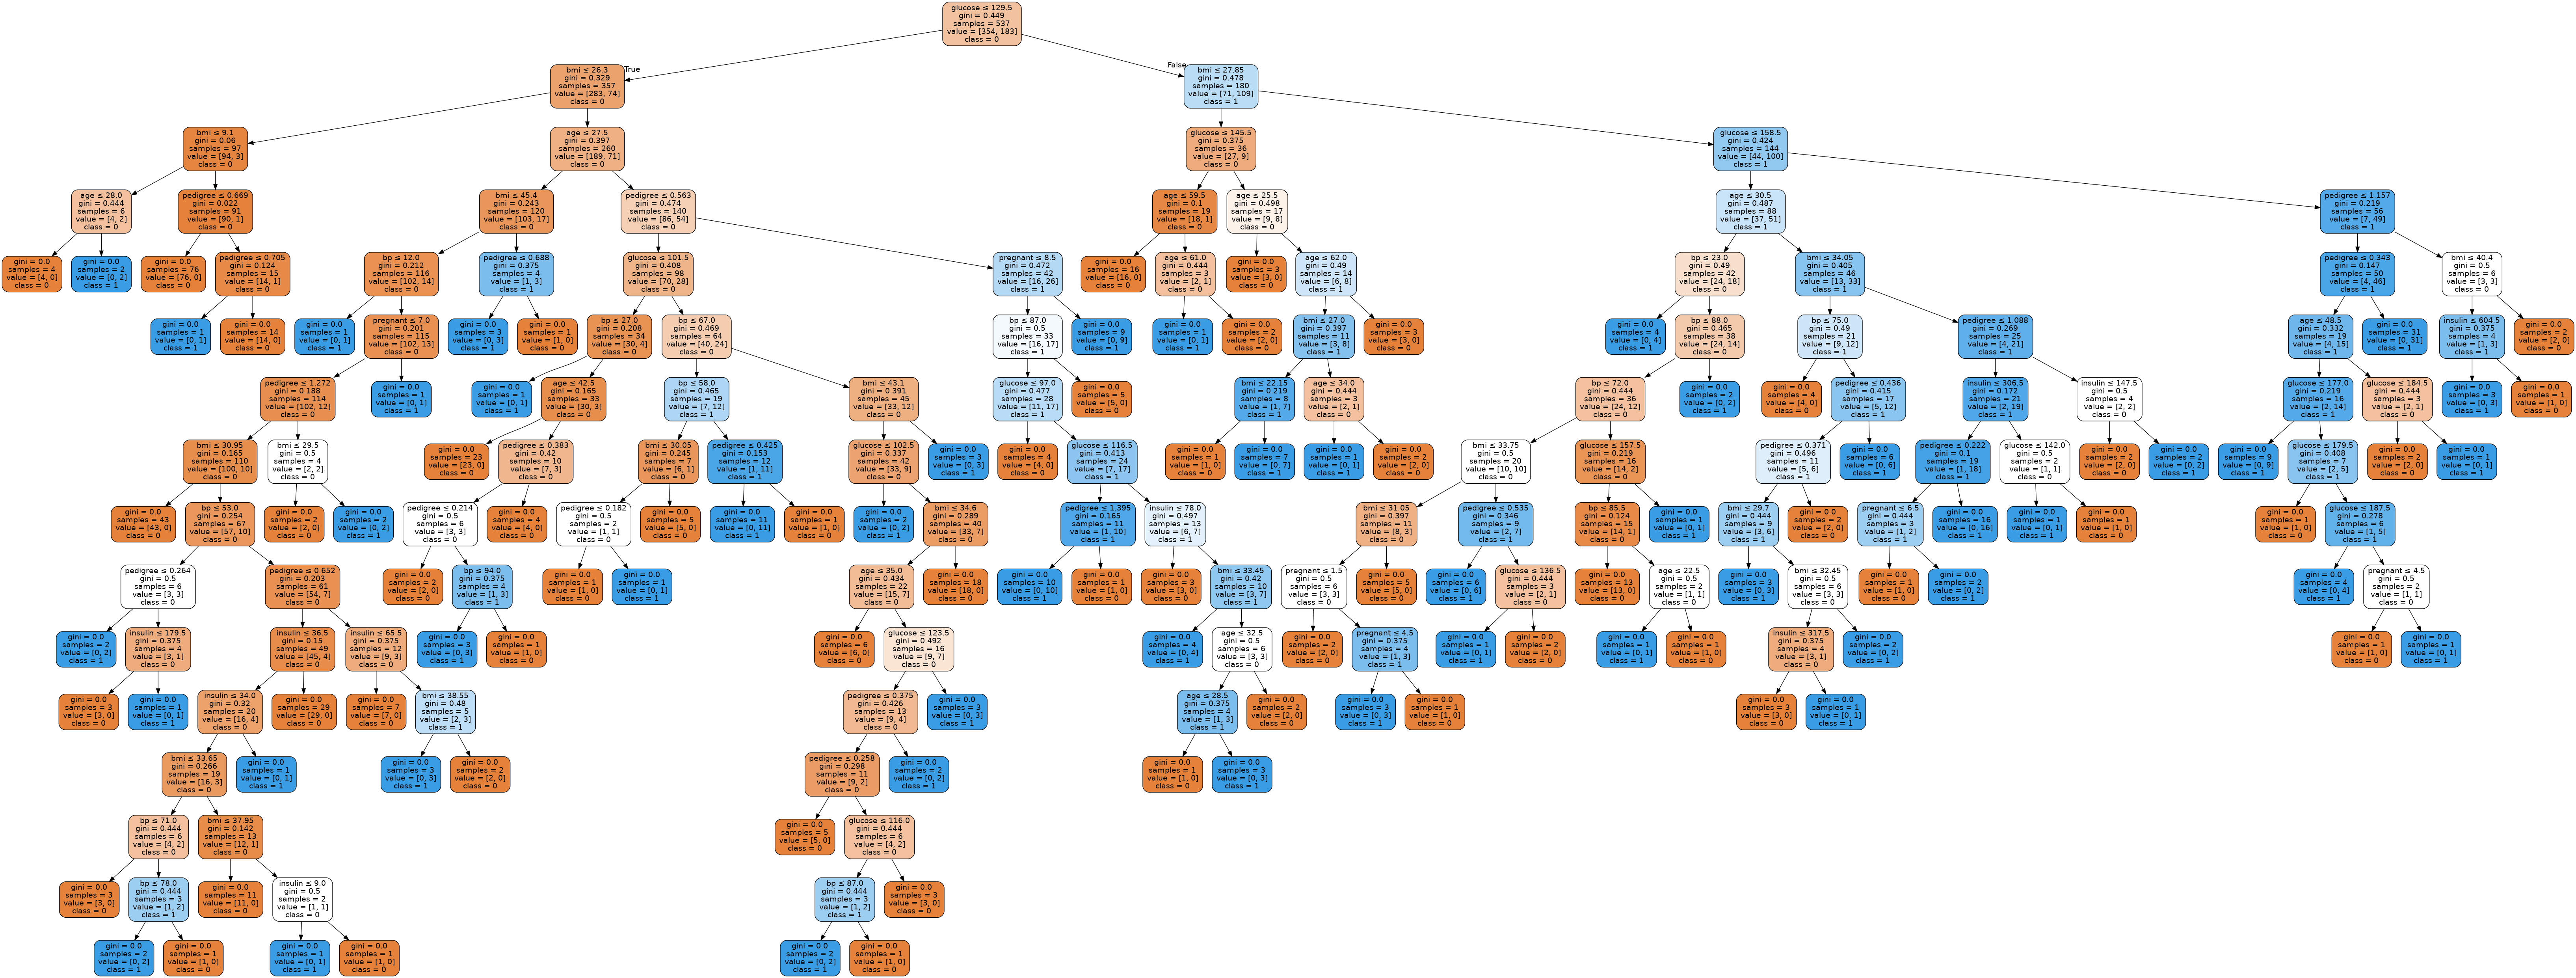

In [7]:
#방금 학습시킨 decision Tree 모델 시각화

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

- 사용되지 않은 정보가 적을 수록 많은 정보를 사용한 것일테니, 정보 이득이 되지 않은 Impurity를 측정해 볼 수 있음.

In [8]:
#정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.1534691109961436
0.14478055934011144


- 학습시킨 Decision Tree 는 정보 이득을 최대화할 수 있는 지점까지 극한적으로 많은 분류 기준을 적용한 경우임을 알 수 있음.

In [9]:
#Decision Tree를 3depth 까지만 발전

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


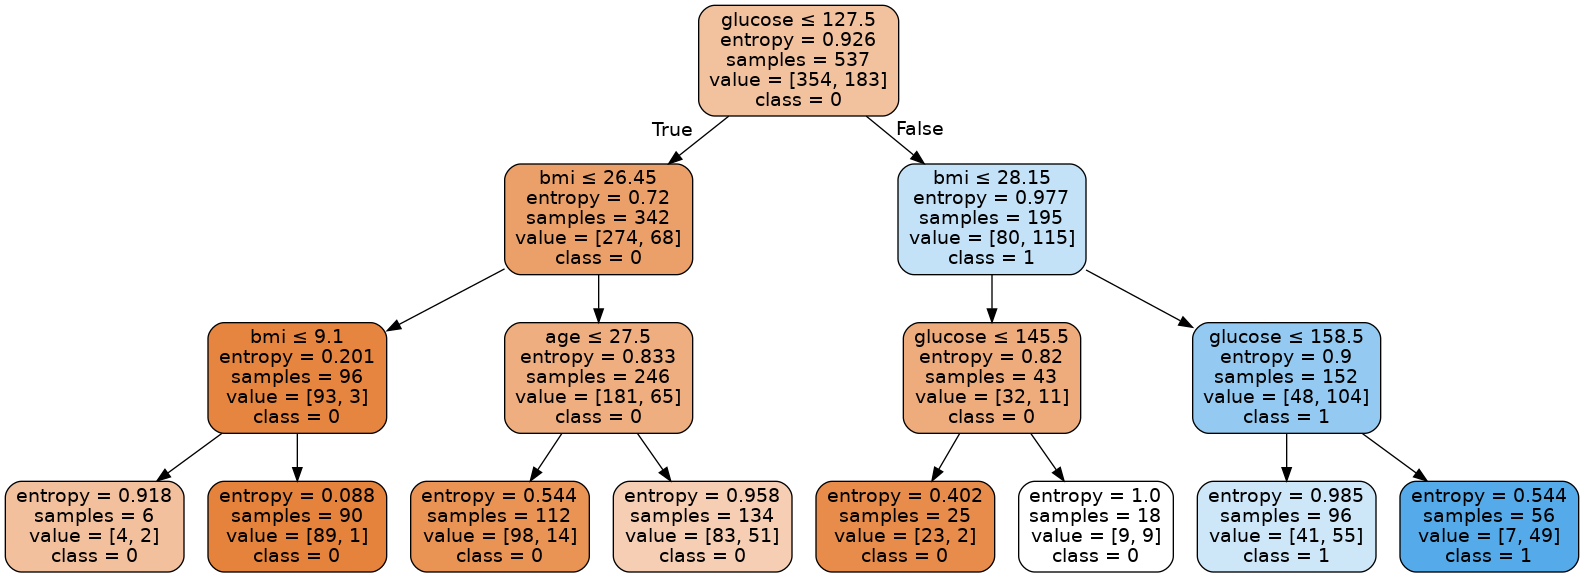

In [10]:
#트리구조

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [11]:
#정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323


- depth를 늘리니까 Accuracy가 올라감.
-  Decision Tree 의 분류 기준은 임의로 정한 것이기 때문에 엔트로피 기준으로는 더욱 정보 이득을 얻을 수 있음에도 불구하고 분류 기준을 더 세우지 않는 것이 전체 모델의 정확도 향상에 낫다는 것을 알 수 있음.
- 무한정 기준을 쪼개서 엔트로피를 떨어뜨릴 수 있지만, 그것은 Overfitting의 결과를 낳게 됨.
- 양한 분류 기준을 가진 Decision Tree 여러 개를 앙상블한 Random Forest 모델은 이러한 문제점을 극복하고 훌륭한 성능을 보일 수 있음.